## Importieren Bibliotheken

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## Hochladen von Dateien 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving label_encoded_table.csv to label_encoded_table (2).csv


## Funktion zur Bewertung der Modellleistung anhand von Klassifikationsmetriken

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1


## Einlesen und Anzeigen in einem DataFrame

In [ ]:
import pandas as pd
from google.colab import files


# Assuming the uploaded file is a CSV, read it into a DataFrame
# Replace 'your_file_name.csv' with the actual name of the uploaded file
data = pd.read_csv('label_encoded_table.csv')

# Now you can display the first 5 rows
print(data.head())


   VOUCHER NUMBER      AMOUNT  CHECK DATE  \
0   PV27242780609  4260645.83  06/18/2024   
1   PV27232768083       94.55  12/29/2023   
2   CVIP232100094   152170.84  06/08/2023   
3  PVCI23CI705786    63250.00        2021   
4  PVCI23CI705786    38554.81        2021   

                        DEPARTMENT NAME CONTRACT NUMBER  \
0                  DEPARTMENT OF HEALTH              DV   
1                      DEPT OF AVIATION              DV   
2                 DEPARTMENT OF HOUSING          190668   
3   DEPT OF FAMILY AND SUPPORT SERVICES          117293   
4  CHICAGO DEPARTMENT OF TRANSPORTATION          124392   

                                         VENDOR NAME  CASHED  False  True  \
0                        USI INSURANCE SERVICES LLC.   False    1.0   0.0   
1                                        PEARL KOCUR   False    1.0   0.0   
2               LAWYERS COMMITTEE FOR BETTER HOUSING    True    0.0   1.0   
3                    YOUNG MEN'S EDUCATIONAL NETWORK    True    0.

## Label-Encoding einer Zielspalte mit scikit-learn

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

# Transform the target column
data['CASHED'] = label_encoder.fit_transform(data['CASHED'])

# The target column is now numeric
print(data['CASHED'].head())


0    0
1    0
2    1
3    1
4    1
Name: CASHED, dtype: int64


## Datenvorverarbeitung und Aufteilung in Trainings- und Testsets

In [ ]:
# Necessary imports
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = data.drop(columns=['CASHED'])  # Replace 'CASHED' with your target column name
y = data['CASHED']

# Identify numerical and categorical columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object', 'category']).columns

# Preprocessing for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessors in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

# Apply preprocessing to the dataset
X_preprocessed = preprocessor.fit_transform(X)

# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


## Definition verschiedener Modelle für Klassifikation und Anomalieerkennung

In [ ]:


# Models
models = {
    "Isolation Forest": IsolationForest(random_state=42, contamination=0.1),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}


## Isolation Forest

In [ ]:
# Isolation Forest
print("Training Isolation Forest...")
iso_forest = IsolationForest(random_state=42, contamination=0.1)
iso_forest.fit(X_train)
y_pred_iso = iso_forest.predict(X_test)
y_pred_iso = [1 if pred == -1 else 0 for pred in y_pred_iso]  # Convert anomaly labels to binary labels

iso_results = {
    "Accuracy": accuracy_score(y_test, y_pred_iso),
    "Precision": precision_score(y_test, y_pred_iso, average='weighted'),
    "Recall": recall_score(y_test, y_pred_iso, average='weighted'),
    "F1 Score": f1_score(y_test, y_pred_iso, average='weighted')
}
print("Isolation Forest Results:", iso_results)


Training Isolation Forest...
Isolation Forest Results: {'Accuracy': 0.09640694919715714, 'Precision': 0.8742187052248047, 'Recall': 0.09640694919715714, 'F1 Score': 0.16203101934847278}


## XGBoost

In [ ]:
# XGBoost
print("Training XGBoost...")
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_accuracy, xgb_precision, xgb_recall, xgb_f1 = evaluate_model(xgb_model, X_test, y_test)

xgb_results = {
    "Accuracy": xgb_accuracy,
    "Precision": xgb_precision,
    "Recall": xgb_recall,
    "F1 Score": xgb_f1
}
print("XGBoost Results:", xgb_results)

Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:51:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Results: {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0}


In [ ]:
# LightGBM
print("Training LightGBM...")
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)
lgbm_accuracy, lgbm_precision, lgbm_recall, lgbm_f1 = evaluate_model(lgbm_model, X_test, y_test)

lgbm_results = {
    "Accuracy": lgbm_accuracy,
    "Precision": lgbm_precision,
    "Recall": lgbm_recall,
    "F1 Score": lgbm_f1
}
print("LightGBM Results:", lgbm_results)


Training LightGBM...


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 298472, number of negative: 5447
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 14.939130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8257
[LightGBM] [Info] Number of data points in the train set: 303919, number of used features: 3847
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.982077 -> initscore=4.003611
[LightGBM] [Info] Start training from score 4.003611
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBM Results: {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0}


## Decision Tree

In [ ]:
# Decision Tree
print("Training Decision Tree...")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_accuracy, dt_precision, dt_recall, dt_f1 = evaluate_model(dt_model, X_test, y_test)

dt_results = {
    "Accuracy": dt_accuracy,
    "Precision": dt_precision,
    "Recall": dt_recall,
    "F1 Score": dt_f1
}
print("Decision Tree Results:", dt_results)

Training Decision Tree...
Decision Tree Results: {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0}


In [ ]:
# Sample a subset of the data (e.g., 10,000 rows)
data_sampled = data.sample(n=10000, random_state=42)  # Passe die Anzahl der Zeilen an
X = data_sampled.drop(columns=['CASHED'])
y = data_sampled['CASHED']


In [ ]:
rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=50,  # Weniger Bäume
    max_depth=10      # Begrenzte Tiefe der Bäume
)


## Random Forest

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd # Import pandas

# ... (Previous code to load and preprocess data)

# Sample a subset of the data (e.g., 10,000 rows)
data_sampled = data.sample(n=10000, random_state=42)  # Passe die Anzahl der Zeilen an
X = data_sampled.drop(columns=['CASHED'])  # Define X here
y = data_sampled['CASHED']

# Identify numerical and categorical columns (redefine here)
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object', 'category']).columns

# Ordinal encoding for categorical features
ordinal_encoder = OrdinalEncoder()
X[categorical_columns] = ordinal_encoder.fit_transform(X[categorical_columns])

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd # Import pandas
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


# ... (Previous code to load and preprocess data)

# Sample a subset of the data (e.g., 10,000 rows)
data_sampled = data.sample(n=10000, random_state=42)  # Passe die Anzahl der Zeilen an
X = data_sampled.drop(columns=['CASHED'])  # Define X here
y = data_sampled['CASHED']

# Identify numerical and categorical columns (redefine here)
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object', 'category']).columns

# Ordinal encoding for categorical features
ordinal_encoder = OrdinalEncoder()
X[categorical_columns] = ordinal_encoder.fit_transform(X[categorical_columns])

# Scale numerical features
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Defining X_train, X_test, y_train, y_test

rf_model = RandomForestClassifier(random_state=42, n_estimators=10)
rf_model.fit(X_train, y_train)

# Extract important features
feature_importances = rf_model.feature_importances_
important_features = X.columns[feature_importances > 0.01]  # Adjust threshold
X = X[important_features]


In [ ]:
rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=50,      # Fewer trees
    max_depth=10,         # Limited depth
    min_samples_split=10, # Require more samples to split a node
    min_samples_leaf=5,   # Minimum samples in a leaf
    n_jobs=-1             # Use all CPU cores
)


In [ ]:
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Random Forest model with parallelization
rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=50,  # Fewer trees for faster computation
    max_depth=10,     # Limit tree depth
    n_jobs=-1         # Use all available CPU cores
)

# Train the Random Forest model
print("Training Random Forest...")
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display metrics
print("Random Forest Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Training Random Forest...
Random Forest Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


## Visualisierung der Modellmetriken mit Balken- und Liniendiagrammen

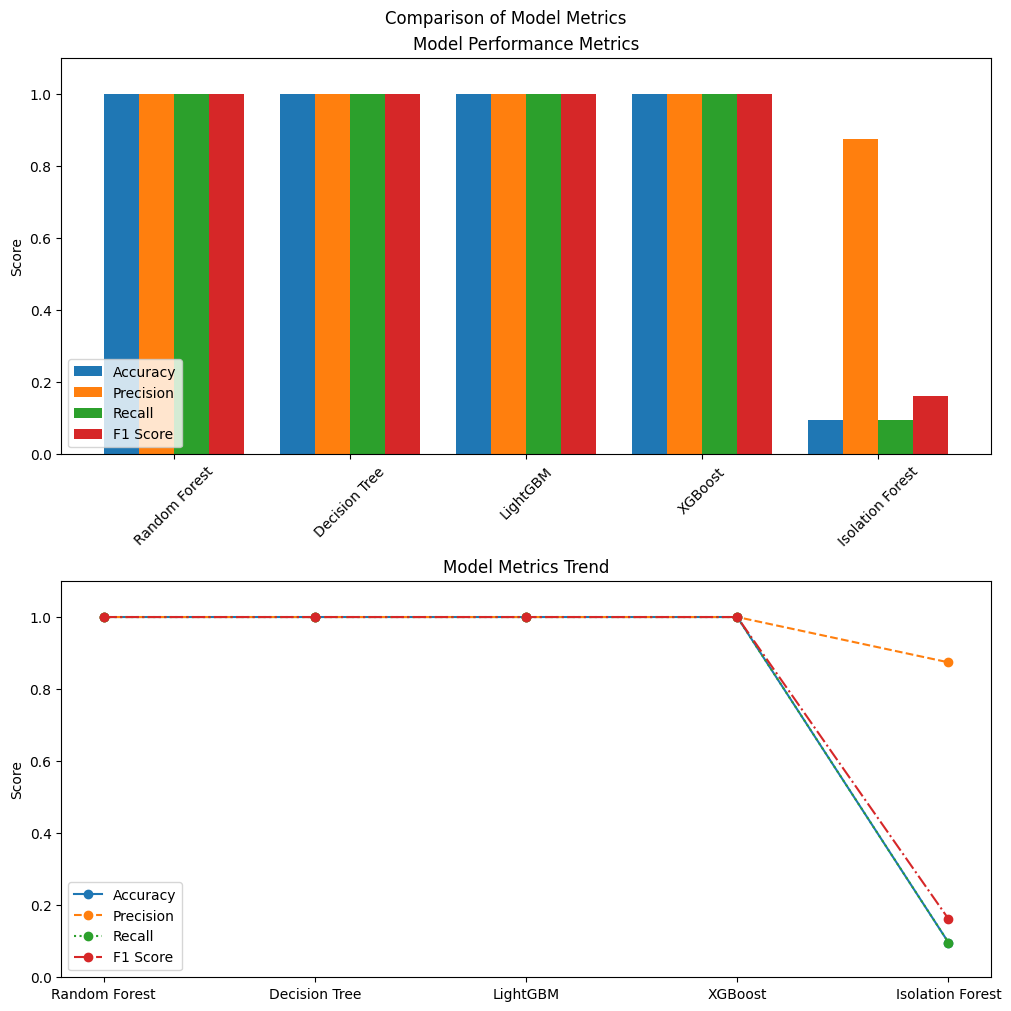

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Metrics for each model
models = [
    "Random Forest", "Decision Tree", "LightGBM", "XGBoost", "Isolation Forest"
]

accuracy = [1.0, 1.0, 1.0, 1.0, 0.0964]
precision = [1.0, 1.0, 1.0, 1.0, 0.8742]
recall = [1.0, 1.0, 1.0, 1.0, 0.0964]
f1_score = [1.0, 1.0, 1.0, 1.0, 0.1620]

# Create subplots to visualize metrics
x = np.arange(len(models))

fig, ax = plt.subplots(2, 1, figsize=(10, 10), constrained_layout=True)

# Bar plot for accuracy, precision, recall, and F1 score
bar_width = 0.2
ax[0].bar(x - 1.5 * bar_width, accuracy, width=bar_width, label="Accuracy")
ax[0].bar(x - 0.5 * bar_width, precision, width=bar_width, label="Precision")
ax[0].bar(x + 0.5 * bar_width, recall, width=bar_width, label="Recall")
ax[0].bar(x + 1.5 * bar_width, f1_score, width=bar_width, label="F1 Score")

ax[0].set_xticks(x)
ax[0].set_xticklabels(models, rotation=45)
ax[0].set_title("Model Performance Metrics")
ax[0].set_ylabel("Score")
ax[0].set_ylim(0, 1.1)
ax[0].legend(loc="lower left")

# Line plot for highlighting Isolation Forest's results separately
ax[1].plot(models, accuracy, marker="o", label="Accuracy", linestyle="-")
ax[1].plot(models, precision, marker="o", label="Precision", linestyle="--")
ax[1].plot(models, recall, marker="o", label="Recall", linestyle=":")
ax[1].plot(models, f1_score, marker="o", label="F1 Score", linestyle="-.")

ax[1].set_title("Model Metrics Trend")
ax[1].set_ylabel("Score")
ax[1].set_ylim(0, 1.1)
ax[1].legend(loc="lower left")

plt.suptitle("Comparison of Model Metrics")
plt.show()


## Visualisierungen der Modellmetriken: Radar Chart und Heatmap

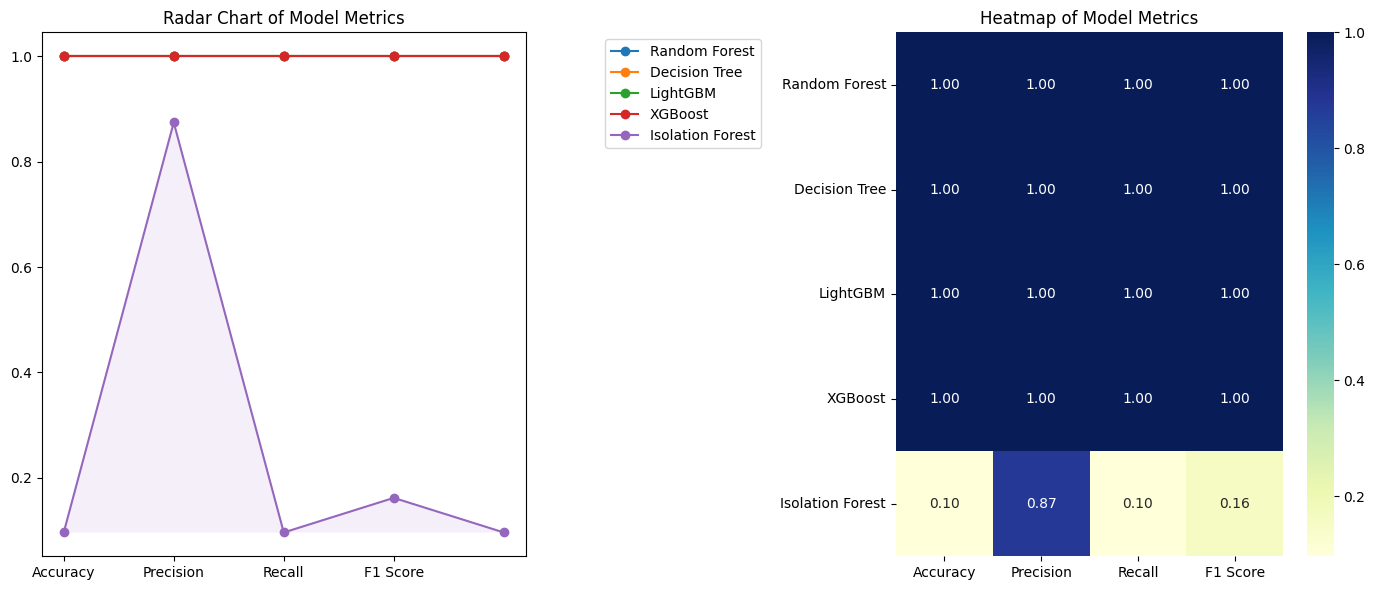

In [ ]:
# Creating alternative plots to visualize the metrics

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Radar chart for metrics comparison
from math import pi

# Data for radar chart
categories = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [
    [1.0, 1.0, 1.0, 1.0],  # Random Forest
    [1.0, 1.0, 1.0, 1.0],  # Decision Tree
    [1.0, 1.0, 1.0, 1.0],  # LightGBM
    [1.0, 1.0, 1.0, 1.0],  # XGBoost
    [0.0964, 0.8742, 0.0964, 0.1620],  # Isolation Forest
]

# Convert data to radar chart format
categories += [categories[0]]  # Loop back to the first category
values = [v + [v[0]] for v in values]

# Plot radar chart
for idx, model in enumerate(models):
    angles = [n / float(len(categories) - 1) * 2 * pi for n in range(len(categories))]
    axs[0].plot(angles, values[idx], label=model, linestyle='-', marker='o')
    axs[0].fill(angles, values[idx], alpha=0.1)

axs[0].set_xticks(angles[:-1])
axs[0].set_xticklabels(categories[:-1])
axs[0].set_title("Radar Chart of Model Metrics")
axs[0].legend(loc='upper right', bbox_to_anchor=(1.5, 1))

# Heatmap for metrics
import seaborn as sns

# Data for heatmap
heatmap_data = np.array([accuracy, precision, recall, f1_score]).T

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    xticklabels=["Accuracy", "Precision", "Recall", "F1 Score"],
    yticklabels=models,
    ax=axs[1],
)

axs[1].set_title("Heatmap of Model Metrics")

plt.tight_layout()
plt.show()


## Vergleich der Metriken für verschiedene Baselines und Algorithmen

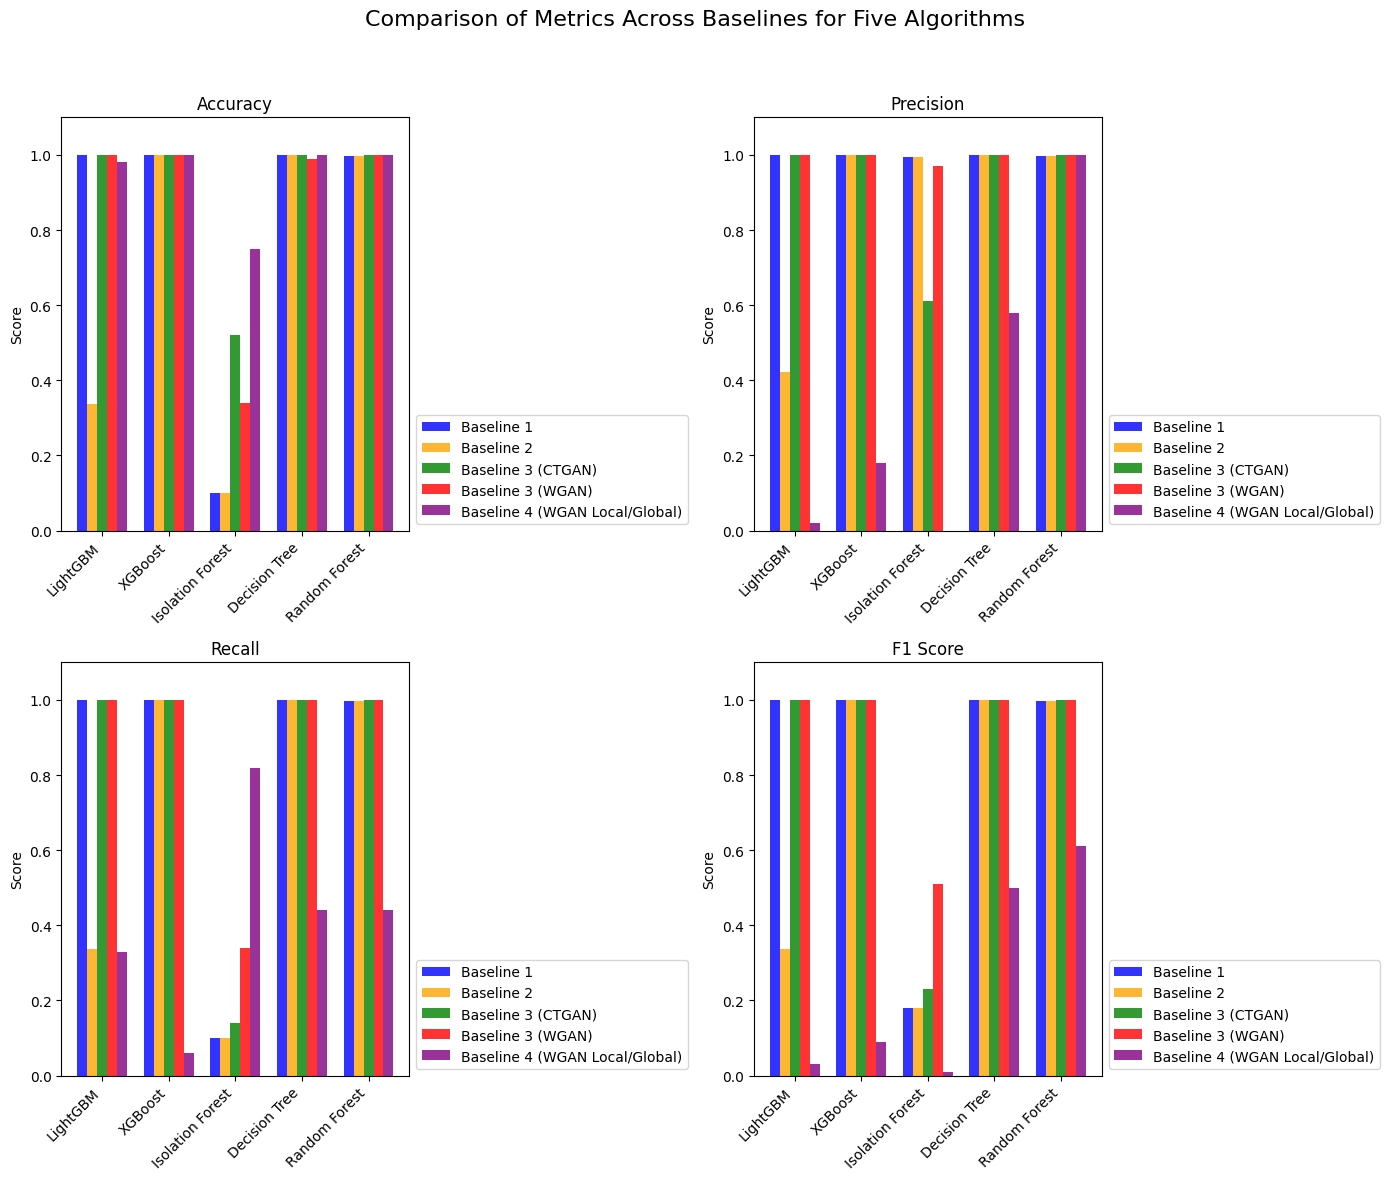

In [ ]:
# Baseline models and metrics for 5 algorithms
models = ["LightGBM", "XGBoost", "Isolation Forest", "Decision Tree", "Random Forest"]
baselines = ["Baseline 1", "Baseline 2", "Baseline 3 (CTGAN)", "Baseline 3 (WGAN)", "Baseline 4 (WGAN Local/Global)"]

metrics = {
    "Accuracy": [
        [1.00, 1.00, 0.10, 1.00, 0.9984],  # Baseline 1
        [0.3371, 1.00, 0.1002, 1.00, 0.9984],  # Baseline 2
        [1.00, 1.00, 0.52, 1.00, 1.00],  # Baseline 3 (CTGAN)
        [1.00, 1.00, 0.34, 0.99, 1.00],  # Baseline 3 (WGAN)
        [0.98, 1.00, 0.75, 1.00, 1.00],  # Baseline 4 (WGAN Local/Global)
    ],
    "Precision": [
        [1.00, 1.00, 0.9941, 1.00, 0.9984],  # Baseline 1
        [0.4222, 1.00, 0.9941, 1.00, 0.9984],  # Baseline 2
        [1.00, 1.00, 0.61, 1.00, 1.00],  # Baseline 3 (CTGAN)
        [1.00, 1.00, 0.97, 1.00, 1.00],  # Baseline 3 (WGAN)
        [0.02, 0.18, 0.00, 0.58, 1.00],  # Baseline 4 (WGAN Local/Global)
    ],
    "Recall": [
        [1.00, 1.00, 0.10, 1.00, 0.9984],  # Baseline 1
        [0.3371, 1.00, 0.1002, 1.00, 0.9984],  # Baseline 2
        [1.00, 1.00, 0.14, 1.00, 1.00],  # Baseline 3 (CTGAN)
        [1.00, 1.00, 0.34, 1.00, 1.00],  # Baseline 3 (WGAN)
        [0.33, 0.06, 0.82, 0.44, 0.44],  # Baseline 4 (WGAN Local/Global)
    ],
    "F1 Score": [
        [1.00, 1.00, 0.1805, 1.00, 0.9983],  # Baseline 1
        [0.3361, 1.00, 0.1805, 1.00, 0.9983],  # Baseline 2
        [1.00, 1.00, 0.23, 1.00, 1.00],  # Baseline 3 (CTGAN)
        [1.00, 1.00, 0.51, 1.00, 1.00],  # Baseline 3 (WGAN)
        [0.03, 0.09, 0.01, 0.50, 0.61],  # Baseline 4 (WGAN Local/Global)
    ],
}

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle("Comparison of Metrics Across Baselines for Five Algorithms", fontsize=16)

metric_names = list(metrics.keys())
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Iterate over each metric
for i, ax in enumerate(axs.flatten()):
    metric = metric_names[i]
    width = 0.15
    x = np.arange(len(models))

    for j, baseline in enumerate(baselines):
        ax.bar(
            x + j * width,
            [metrics[metric][j][k] for k in range(len(models))],
            width=width,
            label=baseline,
            color=colors[j % len(colors)],
            alpha=0.8
        )
    ax.set_title(metric)
    ax.set_ylabel("Score")
    ax.set_xticks(x + width * (len(baselines) - 1) / 2)
    ax.set_xticklabels(models, rotation=45, ha="right")
    ax.set_ylim(0, 1.1)
    ax.legend(loc="lower left", bbox_to_anchor=(1, 0))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
